Os arquivos compactados no arquivo dados_CAPES_2018-04-06.zip trazem dados sobre os programas de pós-graduação em Informática de algumas instituições em 2017. Tratam-se de dados públicos, obtidos da plataforma Sucupira da CAPES (https://sucupira.capes.gov.br/sucupira/). 

O objetivo do trabalho T1.1 é fazer uma análise descritiva e responder algumas perguntas sobre os dados. Sempre que possível, as respostas devem ser dadas numérica e visualmente.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
discentes_df = pd.read_csv('discentes.csv')
docentes_df = pd.read_csv('docentes.csv')
producao_df = pd.read_csv('producao.csv')
trabalhos_df = pd.read_csv('trabalhos.csv')

qualis_df = pd.read_excel('Qualis CC 2013-2016.xlsx')

## Docentes
1) Quantos professores (docentes) havia em cada programa em 2017, em cada quadro (permanente, colaborador, visitante)?

In [3]:
docentes_df.head()

,categoria,ies,nome,prof_id
0,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079
1,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALESSANDRO FABRICIO GARCIA,45076
2,COLABORADOR,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ANTONIO LUZ FURTADO,45077
3,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ARNDT VON STAA,45074
4,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,BRUNO FEIJO,45093


In [4]:
docentes_df.categoria.value_counts()

PERMANENTE     431
COLABORADOR     56
Name: categoria, dtype: int64

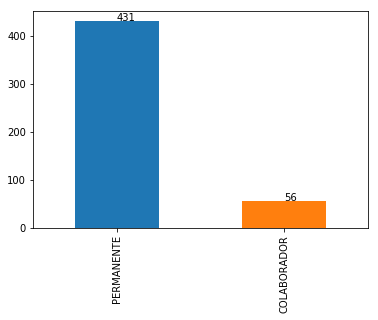

In [5]:
plot = docentes_df.categoria.value_counts().plot(kind='bar')

for idx, value in enumerate(list(docentes_df.categoria.value_counts())): 
    plot.annotate(value,(idx, value), xytext=(0, 0), textcoords='offset points')


In [16]:
discentes_prof_df = discentes_df[['orientador', 'programa']] 
discentes_prof_df = discentes_prof_df.groupby(['orientador', 'programa']).size().to_frame().reset_index()
discentes_prof_df = discentes_prof_df[['orientador', 'programa']]

discentes_prof_df.head()

,orientador,programa
0,ABEL GUILHERMINO DA SILVA FILHO,CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)
1,ADENILSO DA SILVA SIMAO,CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIO...
2,ADRIANA SANTAROSA VIVACQUA,INFORMÁTICA(31001017110P8)
3,ADRIANO ALONSO VELOSO,CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)
4,ADRIANO AUGUSTO DE MORAES SARMENTO,CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)


In [17]:
discentes_prof_df.orientador.describe()

count                458
unique               458
top       ELIANE MARTINS
freq                   1
Name: orientador, dtype: object

In [35]:
# Professores que nao possuem alunos
docentes_df[~docentes_df.nome.isin(discentes_df.orientador.unique())]

,categoria,ies,nome,prof_id
4,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,BRUNO FEIJO,45093
35,COLABORADOR,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO GRANDE...,JORGE LUIS NICOLAS AUDY,86202
50,PERMANENTE,UNIVERSIDADE FEDERAL FLUMINENSE,ALINE MARINS PAES,152411
55,PERMANENTE,UNIVERSIDADE FEDERAL FLUMINENSE,BRUNO LOPES VIEIRA,152538
101,COLABORADOR,UNIVERSIDADE FEDERAL DE MINAS GERAIS,CRISTIANO ARBEX VALLE,172391
127,COLABORADOR,UNIVERSIDADE FEDERAL DE MINAS GERAIS,NEWTON JOSE VIEIRA,49000
167,COLABORADOR,UNIVERSIDADE FEDERAL DE PERNAMBUCO,EDSON COSTA DE BARROS CARVALHO FILHO,31315
179,PERMANENTE,UNIVERSIDADE FEDERAL DE PERNAMBUCO,GUSTAVO HENRIQUE PORTO DE CARVALHO,169215
207,PERMANENTE,UNIVERSIDADE FEDERAL DE PERNAMBUCO,PEDRO MACHADO MANHAES DE CASTRO,111945
236,PERMANENTE,UNIVERSIDADE FEDERAL DO RIO GRANDE DO SUL,ANDRE GRAHL PEREIRA,166203


In [23]:
docentes_prof_categ_df = docentes_df[['categoria', 'nome']]

In [24]:
docentes_prof_categ_df.head()

,categoria,nome
0,PERMANENTE,ALBERTO BARBOSA RAPOSO
1,PERMANENTE,ALESSANDRO FABRICIO GARCIA
2,COLABORADOR,ANTONIO LUZ FURTADO
3,PERMANENTE,ARNDT VON STAA
4,PERMANENTE,BRUNO FEIJO


In [37]:
discentes_categ_df = pd.merge(docentes_prof_categ_df, discentes_prof_df, left_on='nome', right_on='orientador')
discentes_categ_df = discentes_categ_df[['categoria', 'nome', 'programa']]
discentes_categ_df.head()

,categoria,nome,programa
0,PERMANENTE,ALBERTO BARBOSA RAPOSO,INFORMÁTICA(31005012004P9)
1,PERMANENTE,ALESSANDRO FABRICIO GARCIA,INFORMÁTICA(31005012004P9)
2,COLABORADOR,ANTONIO LUZ FURTADO,INFORMÁTICA(31005012004P9)
3,PERMANENTE,ARNDT VON STAA,INFORMÁTICA(31005012004P9)
4,PERMANENTE,CARLOS JOSE PEREIRA DE LUCENA,INFORMÁTICA(31005012004P9)


In [57]:
permanentes = discentes_categ_df[discentes_categ_df.categoria=='PERMANENTE'].programa.value_counts().sort_index()
permanentes

CIÊNCIA DA COMPUTAÇÃO(33002010176P0)                                34
CIÊNCIA DA COMPUTAÇÃO(33003017005P8)                                41
CIÊNCIA DA COMPUTAÇÃO(42005019016P8)                                23
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1)    63
CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)                               68
CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)                               47
COMPUTAÇÃO(31003010046P4)                                           39
COMPUTAÇÃO(42001013004P4)                                           52
INFORMÁTICA(31001017110P8)                                          26
INFORMÁTICA(31005012004P9)                                          23
Name: programa, dtype: int64

In [60]:
colaboradores = discentes_categ_df[discentes_categ_df.categoria=='COLABORADOR'].programa.value_counts().sort_index()
# ja que nao temos colaboradores em CIÊNCIA DA COMPUTAÇÃO(42005019016P8), adicionamos esta key com value 0
colaboradores['CIÊNCIA DA COMPUTAÇÃO(42005019016P8)'] = 0
colaboradores = colaboradores.sort_index()
colaboradores

CIÊNCIA DA COMPUTAÇÃO(33002010176P0)                                 4
CIÊNCIA DA COMPUTAÇÃO(33003017005P8)                                 6
CIÊNCIA DA COMPUTAÇÃO(42005019016P8)                                 0
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1)     6
CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)                               14
CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)                                5
COMPUTAÇÃO(31003010046P4)                                            1
COMPUTAÇÃO(42001013004P4)                                            3
INFORMÁTICA(31001017110P8)                                           2
INFORMÁTICA(31005012004P9)                                           1
Name: programa, dtype: int64

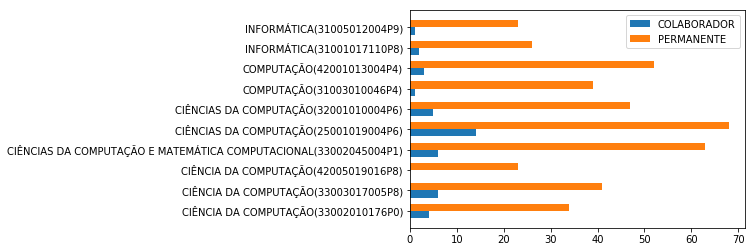

In [61]:
fig, ax = plt.subplots()

width = 0.35

ind = np.arange(len(discentes_categ_df.programa.value_counts().sort_index().keys()))

plt1 = ax.barh(ind-width/2, colaboradores, width)

plt2 = ax.barh(ind+width/2, permanentes, width)

ax.set_yticks(ind)
ax.set_yticklabels(discentes_categ_df.programa.value_counts().sort_index().keys())

plt.legend([plt1[0], plt2[0]], ['COLABORADOR', 'PERMANENTE'])

plt.show()

## Discentes
2) Quantos alunos (discentes) de Mestrado/Doutorado havia em cada programa em 2017?

In [8]:
discentes_df.head()

,abrev,curso,data_matricula,deficiencia,discente_id,ies,nacionalidade,nivel,nome,orientador,orientadores,programa,raca,sexo,situacao
0,"LEON, A. C. (Principal)",INFORMÁTICA,03/08/2015,Não,889714,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Cuba,Mestrado,ADRIAN CONCEPCION LEON,MARKUS ENDLER,"[{'nome': 'MARKUS ENDLER', 'categoria': 'Docen...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,MATRICULADO
1,"HERNANDEZ, A. G. (Principal)",INFORMÁTICA,02/03/2015,Não,838354,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Mestrado,ADRIEL GARCIA HERNANDEZ,RUY LUIZ MILIDIU,"[{'nome': 'RUY LUIZ MILIDIU', 'categoria': 'Do...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,TITULADO
2,"FUENTES, A. D. (Principal)",INFORMÁTICA,15/04/2016,Não,948329,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,ALAIN DOMINGUEZ FUENTES,SERGIO LIFSCHITZ,"[{'nome': 'SERGIO LIFSCHITZ', 'categoria': 'Do...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,MATRICULADO
3,"GUEDES, A. L. V. (Principal) GUEDES, ALAN LIVI...",INFORMÁTICA,12/03/2013,Não,565354,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,ALAN LIVIO VASCONCELOS GUEDES,SIMONE DINIZ JUNQUEIRA BARBOSA,"[{'nome': 'SIMONE DINIZ JUNQUEIRA BARBOSA', 'c...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,TITULADO
4,"MENES, A. M. (Principal)",INFORMÁTICA,01/08/2014,Não,784513,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Mestrado,ALEJANDRO MUSTELIER MENES,SERGIO LIFSCHITZ,"[{'nome': 'SERGIO LIFSCHITZ', 'categoria': 'Do...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,TITULADO


In [9]:
discentes_df.nivel.unique()

array(['Mestrado', 'Doutorado', 'Graduação'], dtype=object)

In [10]:
discentes_pos_df = discentes_df[discentes_df.nivel.isin(["Mestrado", "Doutorado"])]
discentes_pos_df = discentes_pos_df[["nivel", "programa"]]
discentes_pos_df.nivel.value_counts()

Mestrado     1820
Doutorado    1666
Name: nivel, dtype: int64

In [11]:
discentes_pos_df.programa.unique()

array(['INFORMÁTICA(31005012004P9)',
       'CIÊNCIA DA COMPUTAÇÃO(42005019016P8)',
       'COMPUTAÇÃO(31003010046P4)',
       'CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)',
       'CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)',
       'COMPUTAÇÃO(42001013004P4)', 'INFORMÁTICA(31001017110P8)',
       'CIÊNCIA DA COMPUTAÇÃO(33003017005P8)',
       'CIÊNCIA DA COMPUTAÇÃO(33002010176P0)',
       'CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1)'],
      dtype=object)

### Mestrado

In [54]:
mestrado = discentes_pos_df[discentes_pos_df.nivel=='Mestrado'].programa.value_counts().sort_index()
mestrado

CIÊNCIA DA COMPUTAÇÃO(33002010176P0)                                133
CIÊNCIA DA COMPUTAÇÃO(33003017005P8)                                183
CIÊNCIA DA COMPUTAÇÃO(42005019016P8)                                137
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1)    173
CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)                               337
CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)                               270
COMPUTAÇÃO(31003010046P4)                                           168
COMPUTAÇÃO(42001013004P4)                                           194
INFORMÁTICA(31001017110P8)                                          110
INFORMÁTICA(31005012004P9)                                          115
Name: programa, dtype: int64

### Doutorado

In [52]:
doutorado = discentes_pos_df[discentes_pos_df.nivel=='Doutorado'].programa.value_counts().sort_index()
doutorado

CIÊNCIA DA COMPUTAÇÃO(33002010176P0)                                111
CIÊNCIA DA COMPUTAÇÃO(33003017005P8)                                169
CIÊNCIA DA COMPUTAÇÃO(42005019016P8)                                 91
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1)    319
CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)                               379
CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)                               193
COMPUTAÇÃO(31003010046P4)                                           114
COMPUTAÇÃO(42001013004P4)                                           125
INFORMÁTICA(31001017110P8)                                           63
INFORMÁTICA(31005012004P9)                                          102
Name: programa, dtype: int64

### Plot

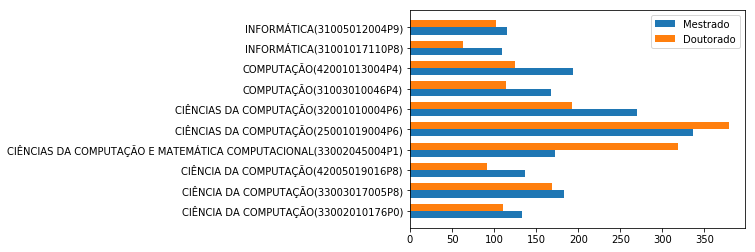

In [56]:
fig, ax = plt.subplots()

width = 0.35

ind = np.arange(len(discentes_pos_df.programa.value_counts().sort_index().keys()))

plt1 = ax.barh(ind-width/2, mestrado, width)

# for i in ind: 
#     ax.annotate(value,(i, discentes_pos_df[discentes_pos_df.nivel=='Mestrado'].programa.value_counts()[i]), 
#                 xytext=(0, 0), textcoords='offset points')


plt2 = ax.barh(ind+width/2, doutorado, width)

ax.set_yticks(ind)
ax.set_yticklabels(discentes_pos_df.programa.value_counts().sort_index().keys())

plt.legend([plt1[0], plt2[0]], ['Mestrado', 'Doutorado'])

plt.show()

## Discentes x Docentes
3) Qual foi a taxa de alunos de Mestrado/Doutorado por professor do quadro permanente em cada programa em 2017?


In [17]:
discentes_pos_df = discentes_df[discentes_df.nivel.isin(["Mestrado", "Doutorado"])]

In [32]:
alunos = set(discentes_pos_df.discente_id)
professores = set(docentes_df[docentes_df.categoria=='PERMANENTE'].prof_id)

print('Total de {} alunos'.format(len(alunos)))
print('Total de {} professores do qudro permanente'.format(len(professores)))
print('Taxa de alunos de Mestrado/Doutorado por professor do quadro permanente {}'.format(len(alunos)/len(professores)))

Total de 3438 alunos
Total de 440 professores do qudro permanente
Taxa de alunos de Mestrado/Doutorado por professor do quadro permanente 7.8136363636363635


In [38]:
docentes_df.head()

,categoria,ies,nome,prof_id
0,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079
1,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALESSANDRO FABRICIO GARCIA,45076
2,COLABORADOR,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ANTONIO LUZ FURTADO,45077
3,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ARNDT VON STAA,45074
4,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,BRUNO FEIJO,45093


4) Qual foi a distribuição de alunos de Mestrado/Doutorado pelos professores de cada programa em 2017?

## Trabalhos de Conclusão
5) Quantos alunos de Mestrado/Doutorado defenderam suas dissertações/teses em 2017 (arquivo trabalhos.csv)?

6) Como os trabalhos de Mestrado/Doutorado defendidos em 2017 foram distribuídos pelas áreas de pesquisa dos programas?

7) Como as defesas de Mestrado/Doutorado foram distribuídas ao longo do ano de 2017?

## Discentes x Trabalhos de Conclusão
8) Qual fração de alunos de Mestrado/Doutorado (do total em cada programa) defendeu em 2017?

## Produção
9) Quantos artigos de periódico/trabalhos em anais foram publicados por cada programa em 2017?

10) Qual é a taxa de artigos de periódico/trabalhos em anais por número de docentes permanentes de cada programa em 2017?

11) Qual fração de artigos de periódico/trabalhos em anais publicados em 2017 teve a coautoria de discentes?

12) Qual fração de artigos de periódico/trabalhos em anais publicados em 2017 teve a coautoria de participantes externos?

## Produção x Qualis
13) Qual é a distribuição de artigos de periódico publicados em 2017, por estrato do Qualis?

14) Considerando os pesos dos artigos de cada estrato do índice restrito ({'A1': 1, 'A2': 0.85, 'B1': 0.70}), qual o índice restrito relativo de cada programa, considerando apenas os artigos em periódicos, e dividido pelo número de docentes permanentes (ordenado do maior para o menor)?

15) Considerando os pesos dos artigos de cada estrato do índice geral ({'A1': 1, 'A2': 0.85, 'B1': 0.70, 'B2': 0.50, 'B3': 0.20, 'B4': 0.10, 'B5': 0.05, 'C': 0.0}), qual o índice geral relativo de cada programa, considerando apenas os artigos em periódicos, e dividido pelo número de docentes permanentes (ordenado do maior para o menor)?